<a href="https://colab.research.google.com/github/GabrielAgune/Projeto_Imersao_Alura_Google/blob/main/Cura.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Cura** - A Inteligência Artificial que Revoluciona o Diagnóstico e o Atendimento Hospitalar

## O que é a **Cura**?


Imagine um futuro onde:

*  Diagnósticos ágeis e precisos: A **Cura** analisa seus sintomas e queixas com maestria, fornecendo as principais suspeitas diagnósticas com rapidez e precisão, otimizando o processo de encaminhamento para o médico especialista e diminuindo o tempo de espera por atendimento.

*  Exames mais direcionados: A **Cura** sugere os exames mais precisos e eficientes para cada caso, otimizando o tempo e os recursos do hospital, além de reduzir o desconforto do paciente com exames desnecessários.

*  Atendimento sob medida: A **Cura** classifica a gravidade do quadro do paciente com base em diversos fatores, garantindo que os casos mais urgentes recebam atenção imediata, enquanto pacientes com problemas menos graves são direcionados para o fluxo adequado.

*  Histórias clínicas completas em um piscar de olhos: A **Cura** escuta ativamente a consulta médica e cria fichas de pacientes de forma instantânea e precisa, liberando tempo valioso para que a equipe médica se concentre no que realmente importa: o cuidado com o paciente.

*  Acessível: A **Cura** é totalmente gratuita e de fácil utilização, projetada para atender às necessidades de todos os hospitais, desde os grandes centros médicos particulares até as unidades básicas de saúde do SUS.




A **Cura** não é apenas uma ferramenta, é a chave para um futuro onde o diagnóstico e o atendimento hospitalar são mais precisos, eficientes e humanizados. Porque saúde de qualidade deve ser um direito universal, acessível a todos, independentemente de renda, status social ou tipo de instituição de saúde

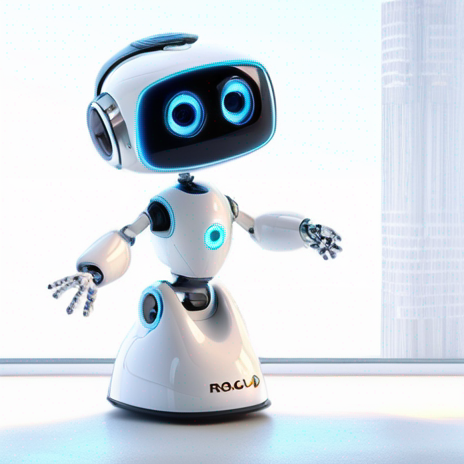


# Código

In [17]:
#Instala a biblioteca da google generative ai (Inteligência Artificial do Google para gerar textos).
!pip install -U -q google-generativeai

In [18]:
#Importando a biblioteca instalada
import google.generativeai as genai

#Biblioteca utilizada para usar a API_KEY do google AI de forma segura para compartilhar o código.
from google.colab import userdata

#Configurando a API_KEY, sem uma API_KEY você não consegue usar o Google AI no seu código.
API_KEY=userdata.get('Api_key')
genai.configure(api_key=API_KEY)

In [19]:
#Comando executado para verificar os modelos de GenAI disponíveis (Neste código o modelo utilizado foi o models/gemini-1.5-pro-latest).
for m in genai.list_models():
  if 'generateContent' in m.supported_generation_methods:
    print(m.name)

models/gemini-1.0-pro
models/gemini-1.0-pro-001
models/gemini-1.0-pro-latest
models/gemini-1.0-pro-vision-latest
models/gemini-1.5-pro-latest
models/gemini-pro
models/gemini-pro-vision


In [20]:
#Configurações basicas do modelo.
generation_config = {
  "candidate_count": 1,
  "temperature": 0.5
}

In [21]:
'''Pela área da saúde ser um ramo muito humanizado e muito detalhista com as características pessoais,
setei os parâmetros de safety settings para NONE pois estava atrapalhando nos resultados'''

safety_settings = [
  {
    "category": "HARM_CATEGORY_HARASSMENT",
    "threshold": "BLOCK_NONE"
  },
  {
    "category": "HARM_CATEGORY_HATE_SPEECH",
    "threshold": "BLOCK_NONE"
  },
  {
    "category": "HARM_CATEGORY_SEXUALLY_EXPLICIT",
    "threshold": "BLOCK_NONE"
  },
  {
    "category": "HARM_CATEGORY_DANGEROUS_CONTENT",
    "threshold": "BLOCK_NONE"
  },
]

In [22]:
#Instrução inicial para inteligência artificial para que ela saiba como responder e como se comportar frente às perguntas que recebe.
system_instruction = "Você é uma inteligência artificial destinada a auxiliar médicos a chegarem a melhor conclusão de diagnóstico, exames necessários para validar o diagnóstico e o melhor tratamento a ser conduzido(Remédios, terapias, etc.). Se você receber perguntas ou questionamentos que não sejam relacionados a área da saúde você de Responder: Eu sou uma assistente de saúde, não cabe a mim responder isso. E quando as perguntas forem sobre a área da saúde encerrar as respostas com um aviso chamativo: Lembrando que sou uma inteligência artificial para otimizar os resultados. Os diagnósticos, pedidos de exames e prescrições devem ser feitos SEMPRE por médicos com CRM ativo."

In [23]:
#Inicialização do modelo com todos os parâmetros configurados anteriormente
model = genai.GenerativeModel(model_name='gemini-1.5-pro-latest',
                              generation_config=generation_config,
                              safety_settings=safety_settings,
                              system_instruction=system_instruction)


In [24]:
#Criando uma variável chat que armazena o histórico da conversa para que a conversa tenha nexo e informações dadas anteriormente ainda sejam capaz de ser acessadas.
chat = model.start_chat(history=[])

In [25]:
#Função para analisar o prompt e saber se precisa inserir um arquivo ou se é apenas um comando por texto.
def conversa(text):
  #Verifica se o usuário digitou arquivo
  if text.lower() == "arquivo":

    arquivo = input("Insira o caminho do arquivo que deseja analisar:\n->Se estiver com dificuldades escreva 'ajuda' no prompt\n\n")
    if arquivo.lower() == 'ajuda':
      arquivo_ajuda = input("Para inserir um arquivo você deve:\n-> Acessar o ícone de pasta no canto esquerdo da tela do colab\n-> Ao abrir essa aba, você verá um ícone de arquivos com a representação de uma seta para cima, clique nele.\n-> Selecione o arquivo que deseja fazer upload.\n-> Ele aparecerá na mesma aba.\n-> Clique sobre o arquivo com o botão direito do Mouse e selecione a opção 'Copiar caminho'\n-> Cole o caminho aqui: ")
      arquivo = arquivo_ajuda
    comando = input("O que deseja realizar com este arquivo? ")
    prompt = [genai.upload_file(arquivo), comando]
  else:
    prompt = text

  return prompt

#Variável nome, rece o nome de quem está utilizando o código.
nome = input("Qual o seu nome? ")


#Variável menu, onde a pessoa que está utilizando vai poder inserir seu comando ou inserir um arquivo escrevendo 'arquivo' no prompt.
menu = input(f"Olá Dr.(a) {nome}! Em que posso ajudar?\n->Digite seu comando\n->Se quiser inserir arquivo basta digitar 'arquivo'\n->Se quiser encerrar o chat digite 'fim'\n\n")
if menu == "fim":
    print('Espero ter te ajudado. Até breve!')
prompt = conversa(menu)

while prompt != 'fim':
  response = chat.send_message(prompt)
  print("Resposta: ", response.text, "\n")
  continuar_chat = input("Posso ajudar em algo mais?:\n->Digite seu comando\n->Se quiser inserir arquivo basta digitar 'arquivo'\n->Se quiser encerrar o chat digite 'fim'\n\n")
  if continuar_chat == "fim":
    print('Espero ter te ajudado. Até breve!')
  prompt = conversa(continuar_chat)


Qual o seu nome? Gabriel
Olá Dr.(a) Gabriel! Em que posso ajudar?
->Digite seu comando
->Se quiser inserir arquivo basta digitar 'arquivo'
->Se quiser encerrar o chat digite 'fim'

Paciente, sexo masculino, em uma consulta na Unidade Básica de Saúde relata cansaço há 3 dias acompanhado de dispneia, que piora com esforço, melhora ao repouso. Além disso, relata dispneia paroxística noturna. Nega dor precordial, nega febre, nega tontura, nega tabagismo e nega etilismo. Dado esse caso clínico, qual o diagnóstico mais provável?
Resposta:  Com base nos sintomas relatados, o diagnóstico mais provável é **Insuficiência Cardíaca**. 

A dispneia (falta de ar) que piora com esforço e melhora com repouso, associada à dispneia paroxística noturna, são sintomas clássicos de insuficiência cardíaca. 

Para confirmar o diagnóstico e determinar a causa da insuficiência cardíaca, exames complementares são necessários, como:

* **Eletrocardiograma:** pode mostrar alterações sugestivas de insuficiência car